In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mode
from collections import Counter

Exporting DataSet

In [2]:
train = pd.read_csv(r"E:\guvi BA\project BA\loan_train.csv")
test = pd.read_csv(r"E:\guvi BA\project BA\loan_test.csv")

In [3]:
train[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
test.shape

(367, 12)

In [8]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
train['Loan_ID'].nunique()

614

In [10]:
test['Loan_ID'].nunique()

367

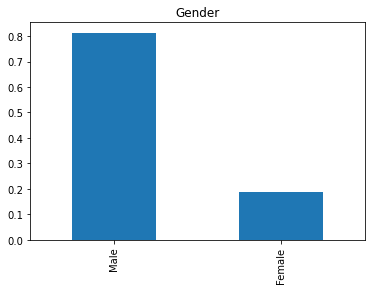

In [11]:
train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')
plt.show()

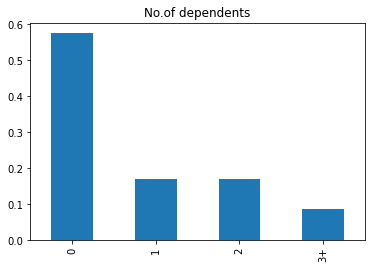

In [12]:
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'No.of dependents')
plt.show()

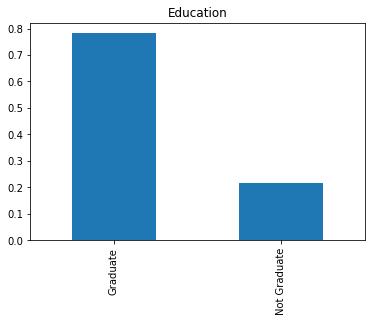

In [13]:
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.show()

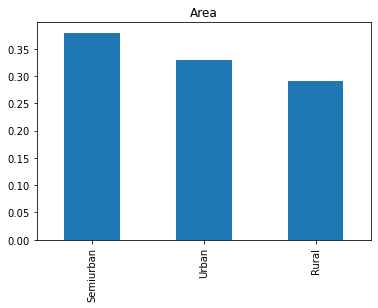

In [14]:
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Area')
plt.show()

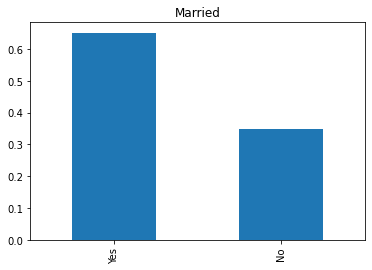

In [15]:
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.show()

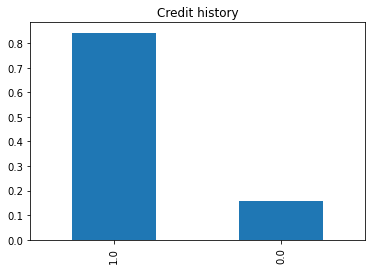

In [16]:
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit history')
plt.show()

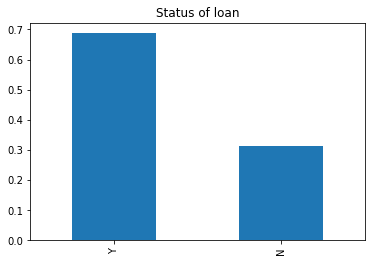

In [17]:
train['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Status of loan')
plt.show()

C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


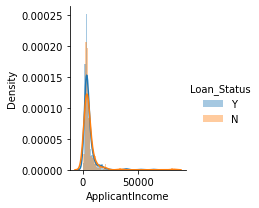

In [18]:
sns.FacetGrid(train,hue = 'Loan_Status').map(sns.distplot,'ApplicantIncome').add_legend()
plt.show()

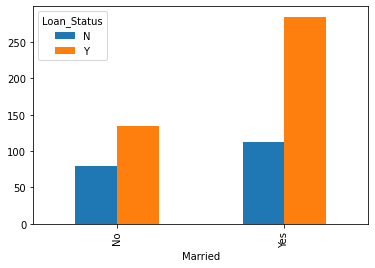

In [19]:
tab = pd.crosstab(train['Married'],train['Loan_Status'])
tab.plot.bar()
plt.show()

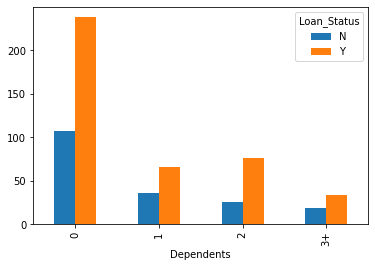

In [20]:
tab = pd.crosstab(train['Dependents'],train['Loan_Status'])
tab.plot.bar()
plt.show()

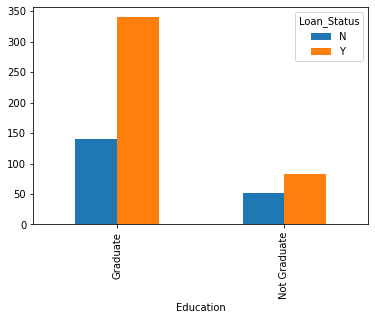

In [21]:
tab = pd.crosstab(train['Education'],train['Loan_Status'])
tab.plot.bar()
plt.show()

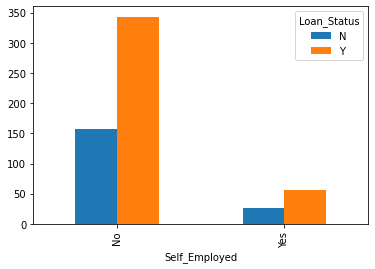

In [22]:
tab = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
tab.plot.bar()
plt.show()

In [23]:
train.groupby('Loan_Status').size()

Loan_Status
N    192
Y    422
dtype: int64

In [24]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Education'].fillna(train['Education'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [26]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace = True)

In [27]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Education'].fillna(test['Education'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace = True)

In [28]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace = True)

In [29]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
train1 = pd.get_dummies(train, columns=['Gender', 'Married', 'Dependents', 'Education', 
                                        'Self_Employed', 'Property_Area'])

In [33]:
test1 = pd.get_dummies(test, columns=['Gender', 'Married', 'Dependents', 'Education', 
                                        'Self_Employed', 'Property_Area'])

In [34]:
train1['Loan_Status'] = train1['Loan_Status'].replace(to_replace=['N', 'Y'], value=['0', '1'])

In [35]:
train1[0:10]

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
5,LP001011,5417,4196.0,267.0,360.0,1.0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
6,LP001013,2333,1516.0,95.0,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
7,LP001014,3036,2504.0,158.0,360.0,0.0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
8,LP001018,4006,1526.0,168.0,360.0,1.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
9,LP001020,12841,10968.0,349.0,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [36]:
test1[0:10]

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
5,LP001054,2165,3422,152.0,360.0,1.0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
6,LP001055,2226,0,59.0,360.0,1.0,1,0,1,0,...,1,0,0,0,1,1,0,0,1,0
7,LP001056,3881,0,147.0,360.0,0.0,0,1,0,1,...,0,1,0,0,1,1,0,1,0,0
8,LP001059,13633,0,280.0,240.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
9,LP001067,2400,2400,123.0,360.0,1.0,0,1,1,0,...,0,0,0,0,1,1,0,0,1,0


In [37]:
train1['Loan_Status'] = train1['Loan_Status'].astype(int)

In [38]:
train1.dtypes

Loan_ID                     object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int32
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [39]:
test1.dtypes

Loan_ID                     object
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

<AxesSubplot:>

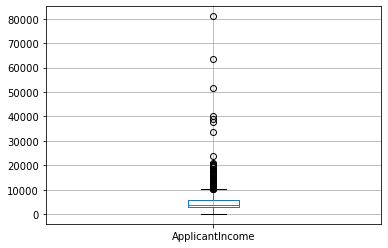

In [40]:
train1.boxplot(column=['ApplicantIncome'])

<AxesSubplot:>

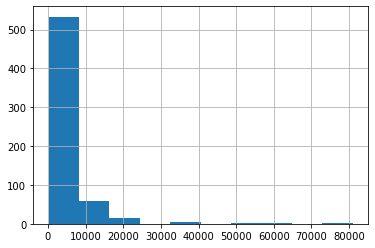

In [41]:
train1['ApplicantIncome'].hist()

<AxesSubplot:>

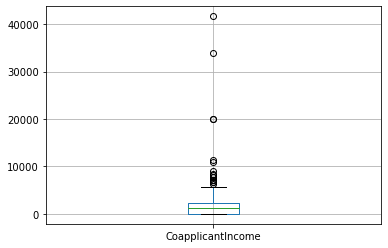

In [42]:
train1.boxplot(column=['CoapplicantIncome'])

<AxesSubplot:>

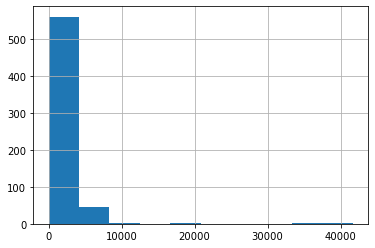

In [43]:
train1['CoapplicantIncome'].hist()

<AxesSubplot:>

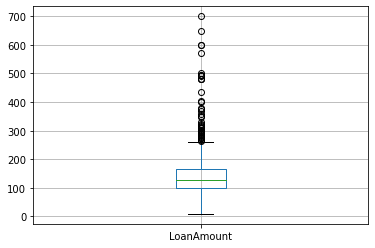

In [44]:
train1.boxplot(column=['LoanAmount'])


<AxesSubplot:>

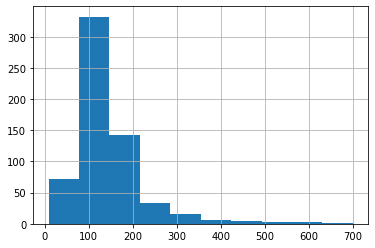

In [45]:
train1['LoanAmount'].hist()

<AxesSubplot:>

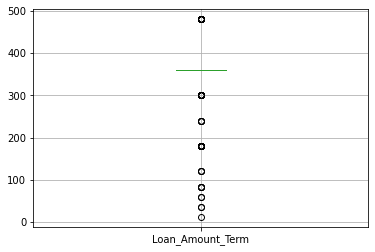

In [46]:
train1.boxplot(column=['Loan_Amount_Term'])

<AxesSubplot:>

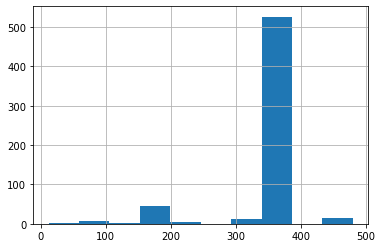

In [47]:
train1['Loan_Amount_Term'].hist()

In [48]:
train1['ApplicantIncome'] = train1['ApplicantIncome'].clip(0, 25000)
test1['ApplicantIncome'] = test1['ApplicantIncome'].clip(0, 25000)

<AxesSubplot:>

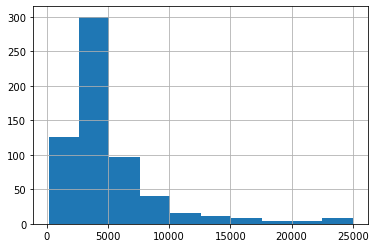

In [49]:
train1['ApplicantIncome'].hist()

In [50]:
train1['CoapplicantIncome'] = train1['CoapplicantIncome'].clip(0, 10000)
test1['CoapplicantIncome'] = test1['CoapplicantIncome'].clip(0, 10000)

<AxesSubplot:>

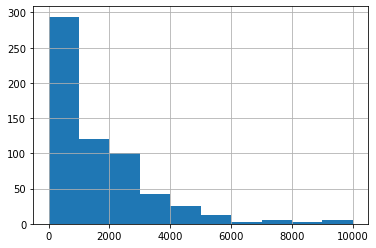

In [51]:
train1['CoapplicantIncome'].hist()


In [52]:
Y = train1[train1.columns[6]]

In [53]:
X = train1
X = X.drop(['Loan_ID','Loan_Status'], axis=1)

In [54]:
X.shape

(614, 20)

In [55]:
Y.shape

(614,)

In [56]:
validation_size = 0.20
seed = 1

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 42, test_size = 0.30)
X_train.shape

(429, 20)

In [59]:
X_train[0:5]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
553,2454,2333.0,181.0,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
601,2894,2792.0,155.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0
261,2060,2209.0,134.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
496,2600,1700.0,107.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0
529,6783,0.0,130.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0


In [60]:
Y_train.shape

(429,)

In [61]:
Y_train[0:5]

553    0
601    1
261    1
496    1
529    1
Name: Loan_Status, dtype: int32

In [62]:
import statsmodels.api as sm
x1=sm.add_constant(X)
x1

,const,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849,0.0,128.0,360.0,1.0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,1.0,3000,0.0,66.0,360.0,1.0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,1.0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,1.0,6000,0.0,141.0,360.0,1.0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,2900,0.0,71.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,1.0,4106,0.0,40.0,180.0,1.0,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,1.0,7583,0.0,187.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [63]:
logit= sm.Logit(Y,x1)
result=logit.fit()
(result.summary2(X))

         Current function value: 0.456453
         Iterations: 35


C:\Users\bharg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Results: Logit
=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [64]:
import scipy 
from scipy.stats import chi2
chi2.pdf(1.74,2)

0.2094757746238195

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0,test_size=0.25)#25% from test data for prediction
len(x_train), len(x_test), len(y_train), len(y_test) 

(460, 154, 460, 154)

In [67]:
Lreg=LogisticRegression()
Lreg.fit(x_train,y_train.ravel())

LogisticRegression()

In [68]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\bharg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_predict =Lreg.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [70]:
y_pred = classifier.predict(X)

In [71]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [72]:
y_pred_df

,actual,predicted_prob
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
609,1,1
610,1,1
611,1,1
612,1,1


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [74]:
score = accuracy_score(y_test,y_predict)
score

0.8311688311688312

In [75]:
confusion_matrix(y_test,y_predict)

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [76]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict).ravel()
tn,fp,fn,tp

(19, 24, 2, 109)

In [77]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



#decison Tree

In [78]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [79]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

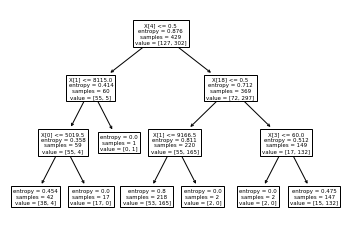

In [80]:
tree.plot_tree(dt);

In [81]:
preds = dt.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 


1    156
0     29
dtype: int64

In [82]:
print('The accuracy of Decision Tree Classifier is: ', dt.score(X_test,Y_test))

The accuracy of Decision Tree Classifier is:  0.7837837837837838


RANDOM FOREST

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error',max_depth=5,min_samples_split=4,
min_samples_leaf=3)


In [84]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=200)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

predicted=rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted))
print("R Square score: %.2f" % r2_score(Y_test, predicted))

Mean squared error: 0.16
R Square score: 0.30


Text(0, 0.5, 'True Positive Rate')

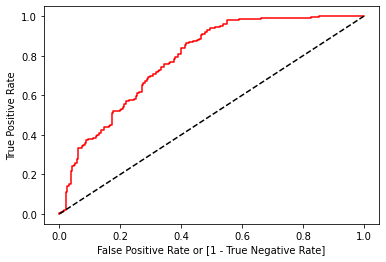

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [89]:
Accuracy = (tp+tn) / (tp+tn+fp+fn)
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

Accuracy
specificity
sensitivity

0.9819819819819819

In [90]:
Lreg = LogisticRegression()
Lreg.fit(x_train,y_train.ravel())

y_predict = Lreg.predict(x_test)
y_predict

y_predict_train = Lreg.predict(x_train)
y_predict_train

y_prob_train = Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

y_prob = Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)

array([[0.85908759, 0.87898074, 0.69131282, 0.76695414, 0.87604219,
        0.16641893, 0.88990424, 0.80625117, 0.13670219, 0.85257449,
        0.88254753, 0.83693921, 0.854364  , 0.83162648, 0.88654798,
        0.74334694, 0.65048879, 0.74724633, 0.79061897, 0.08999383,
        0.17392468, 0.85738166, 0.75666752, 0.723487  , 0.75895868,
        0.79004582, 0.79098484, 0.81886217, 0.27562644, 0.29893144,
        0.86585542, 0.63240179, 0.71702812, 0.73502411, 0.84949351,
        0.17607172, 0.84341293, 0.57112056, 0.87983949, 0.80921303,
        0.79889504, 0.13901227, 0.93409508, 0.57233474, 0.86312862,
        0.65980198, 0.83770991, 0.87864178, 0.67811746, 0.69067423,
        0.81444922, 0.76387047, 0.63389088, 0.70690853, 0.73614127,
        0.8158808 , 0.78223841, 0.60648279, 0.76760957, 0.73285881,
        0.17550073, 0.86548759, 0.64977248, 0.18788999, 0.8807144 ,
        0.58316026, 0.83397554, 0.82873058, 0.71329577, 0.74043313,
        0.67085854, 0.89384214, 0.62767674, 0.79

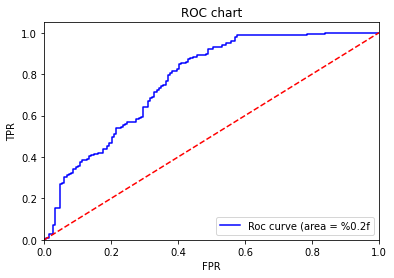

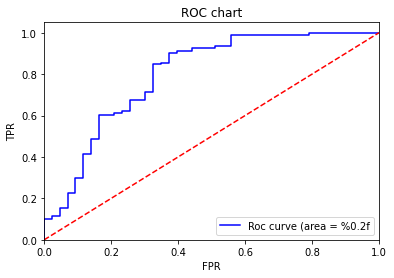

In [91]:
log_roc_auc = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresold1 = roc_curve(y_train,y_prob_train)

plt.figure()
plt.plot(fpr1,tpr1,color='blue',label = "Roc curve (area = %0.2f")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC chart')
plt.legend(loc="lower right")
plt.show()

log_roc_auc = roc_auc_score(y_test,y_predict)
fpr,tpr,thresold = roc_curve(y_test,y_prob)

plt.figure()
plt.plot(fpr,tpr,color='blue',label = "Roc curve (area = %0.2f")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC chart')
plt.legend(loc="lower right")
plt.show()

In [92]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1),threshold=0.3)[0]

y_predict_class = y_predict_class1.astype(int)
confusion_matrix2 = confusion_matrix(y_test,y_predict_class)
# classification_report(y_test,y_predict_class)
confusion_matrix2

array([[ 19,  24],
       [  1, 110]], dtype=int64)